In [1]:
import cv2
import numpy as np
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from skimage.feature import hog
import matplotlib.image as mpimg

In [2]:
vehicles_train = []

In [3]:
path_dir = './vehicles/vehicles/'

folder_list = os.listdir(path_dir)
file_list = {}
all_vehicles = []

# 파일 리스트 읽기
for index, i in enumerate(folder_list[1:]):
    file_list[i] = os.listdir(path_dir + i)

    
# 파일 읽기    
for key in file_list.keys():
    for value in file_list[key][1:]:
        all_vehicles.append(cv2.imread(path_dir + key +'/'+ value))

In [4]:
for i in all_vehicles:
    vehicles_train.append([1, i])

In [5]:
path_dir = './non-vehicles/non-vehicles/GTI'

file_list = os.listdir(path_dir)
all_non_vehicles = []
# 파일 리스트 읽기
for i in file_list:
    all_non_vehicles.append(cv2.imread(path_dir + '/'+ i))

all_non_vehicles = all_non_vehicles[1:]
# 파일 읽기 

In [6]:
for i in all_non_vehicles:
    vehicles_train.append([0, i])

In [7]:
labels = []
train = []
for i in vehicles_train:
    labels.append(i[0])
    train.append(i[1])

In [8]:
labels = np.array(labels)
train = np.array(train)

In [9]:
train.shape

(12692, 64, 64, 3)

In [260]:
X_train.shape

(8884, 64, 64, 3)

In [261]:
X_test.shape # 64 * 64 사이즈의 이미지가 bgr이라는 컬러로. 

(3808, 64, 64, 3)

In [262]:
y_train.shape

(8884,)

In [263]:
y_test.shape

(3808,)

In [10]:
def histogram_feature(img):
    
    hist = cv2.calcHist(images=[img], channels=[0], mask=None,
                histSize=[32], ranges=[0, 256]) 
    hist_flat = hist.flatten() #[[1, 2, 3], [4, 5, 6]] 2차원 벡터  flatten() = [1, 2, 3, 4, 5, 6] 
    #plt.plot(hist_flat, color='blue')
    #binX = np.arange(32)
    #plt.bar(binX, hist_flat, width=1, color='b')
    return hist_flat

def hogs_feature(img):
    hogs=[]
    b, g, r = img[:,:,0], img[:,:,1], img[:,:,2] # 21000개 중복 x grayscale = r * 0.8 + g * 0.24 + b * 0.06

    for image in (b, g, r):
        hog_feature, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2-Hys'
                                     , transform_sqrt=False, visualize=True, feature_vector=False)
        flat_hog = hog_feature.flatten()
        hogs.append(flat_hog)
    return np.array(hogs).flatten()
        #fig = plt.figure()
        #plt.subplot(121)
        #plt.imshow(image)
        #plt.subplot(122)
        #plt.imshow(hog_image, cmap='gray')

def raw_feature(img):
    resized = cv2.resize(img, (64, 64), interpolation = cv2.INTER_NEAREST)
    resized_flat = resized.flatten()
    return resized_flat
#     cv2.imshow('res', resized)
#     cv2.imshow('img', img)
#     cv2.waitKey()
#     cv2.destroyAllWindows()

In [ ]:
0 ~ 7 0번째
8~ 15 1번째 0~31 축소 0~ 255

In [12]:
def my_pipe(img):
    i = np.append(np.append(histogram_feature(img), hogs_feature(img), axis=0), raw_feature(img), axis = 0)
    return (i)
#     print(histogram_feature(img).shape)
#     print(hogs_feature(img).shape)
#     print(raw_feature(img).shape)
#     print(i.shape)

In [16]:
labels.shape

(12692,)

In [15]:
train.shape

(12692, 64, 64, 3)

In [ ]:
train_data = []
for img in train:
    train_data.append(my_pipe(img))

In [ ]:
labels_data = []
for img in labels:
    labels_data.append(my_pipe(img))

In [ ]:
train_data = np.array(train_data)
labels_data = np.array(labels_data)

In [ ]:
train_data.shape

In [ ]:
labels_data.shape

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(train_data, labels_data, test_size = 0.3, stratify=y_train, random_state = 999)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
#skfold = StratifiedKFold(n_splits = 3, shuffle=True, random_state=999)

# 파라미터
C = [0.01, 5]
gamma = [0.001]

# 파라미터 그리드
params = {'C': C, 'gamma': gamma}

# 교차검증
svc_grid = GridSearchCV(estimator=SVC(probability=True), param_grid=params, cv=3, scoring="accuracy", n_jobs = -1)

# 모델 fitting
svc_grid.fit(X_train, y_train)

# 결과
print(svc_grid.best_score_)
print(svc_grid.best_params_)

800 개에 대해서

0.6937521706888945

{'C': 0.01, 'gamma': 0.001}

In [295]:
np.append([1, 2, 3], [1, 2, 3])

array([1, 2, 3, 1, 2, 3])

In [286]:
y_train[:100]

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1])

In [173]:
raw_feature(img)

In [139]:
cv2.imshow('b', b)
cv2.imshow('g', g)
cv2.imshow('r', r)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
0, 255 방향성 = 1
0, 100 방향성 = 0.45
0, 0 방향성(변화율) = 0

In [ ]:
0, 0, 0 = black
255, 255, 255 = white

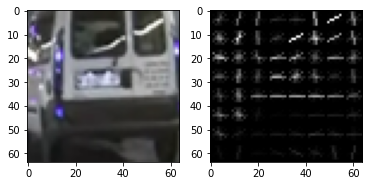

In [140]:
fig = plt.figure()
plt.subplot(121)
plt.imshow(src)
plt.subplot(122)
plt.imshow(hog_image, cmap='gray')

In [118]:
hist_flat

array([  0.,   1.,  63., 314., 373., 583., 390., 255., 250., 182., 123.,
        68.,  93.,  71.,  76.,  80., 119., 139., 163., 173., 188., 182.,
        91.,  27.,  19.,  19.,  17.,   9.,   8.,   4.,   6.,  10.],
      dtype=float32)